In [3]:
from __future__ import print_function, division  # for compatibility with python 3.x
import warnings
warnings.filterwarnings('ignore')  # don't print out warnings

#watermark not necessary?
# %install_ext https://raw.githubusercontent.com/rasbt/watermark/master/watermark.py
# %load_ext watermark
# %watermark -v -m -p python,pandas,numpy,matplotlib,seaborn,scikit-learn,scipy -g


In [8]:
from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML
import nba_py

# figures inline in notebook
%matplotlib inline

np.set_printoptions(suppress=True)

DISPLAY_MAX_ROWS = 20  # number of max rows to print for a DataFrame
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

In [172]:
from nba_py import player

data_og = pd.DataFrame()

# lebron_summary = player.PlayerSummary("2544")
# data2 = lebron_summary.headline_stats()

# curry_summary = player.PlayerGeneralSplits("201939")
# data1 = curry_summary.headline_stats()

player_general_splits = player.PlayerGeneralSplits("2544")
data_og = data_og.append(player_general_splits.overall())
list(data_og.columns.values)

#blocks
#steals 
#fg pct
#3ptfg pct
#ast

[u'GROUP_SET',
 u'GROUP_VALUE',
 u'GP',
 u'W',
 u'L',
 u'W_PCT',
 u'MIN',
 u'FGM',
 u'FGA',
 u'FG_PCT',
 u'FG3M',
 u'FG3A',
 u'FG3_PCT',
 u'FTM',
 u'FTA',
 u'FT_PCT',
 u'OREB',
 u'DREB',
 u'REB',
 u'AST',
 u'TOV',
 u'STL',
 u'BLK',
 u'BLKA',
 u'PF',
 u'PFD',
 u'PTS',
 u'PLUS_MINUS',
 u'DD2',
 u'TD3',
 u'GP_RANK',
 u'W_RANK',
 u'L_RANK',
 u'W_PCT_RANK',
 u'MIN_RANK',
 u'FGM_RANK',
 u'FGA_RANK',
 u'FG_PCT_RANK',
 u'FG3M_RANK',
 u'FG3A_RANK',
 u'FG3_PCT_RANK',
 u'FTM_RANK',
 u'FTA_RANK',
 u'FT_PCT_RANK',
 u'OREB_RANK',
 u'DREB_RANK',
 u'REB_RANK',
 u'AST_RANK',
 u'TOV_RANK',
 u'STL_RANK',
 u'BLK_RANK',
 u'BLKA_RANK',
 u'PF_RANK',
 u'PFD_RANK',
 u'PTS_RANK',
 u'PLUS_MINUS_RANK',
 u'DD2_RANK',
 u'TD3_RANK',
 u'CFID',
 u'CFPARAMS']

In [141]:
data = pd.DataFrame()
j = 0
for ID in player.PlayerList(league_id='00', season='2016-17', only_current=1).info().PERSON_ID:

    player_general_splits = player.PlayerGeneralSplits(str(ID))
    temp_data = player_general_splits.overall()
    print(temp_data)
    data = data.append(temp_data)


  GROUP_SET GROUP_VALUE  GP   W   L  W_PCT   MIN  FGM  FGA  FG_PCT    ...     \
0   Overall     2016-17  68  37  31  0.544  15.5  2.0  5.0   0.393    ...      

   BLK_RANK  BLKA_RANK  PF_RANK  PFD_RANK  PTS_RANK  PLUS_MINUS_RANK  \
0         1          1        1         1         1                1   

   DD2_RANK  TD3_RANK  CFID  CFPARAMS  
0         1         1    33   2016-17  

[1 rows x 60 columns]
  GROUP_SET GROUP_VALUE  GP   W   L  W_PCT   MIN  FGM  FGA  FG_PCT    ...     \
0   Overall     2016-17  38  11  27  0.289  14.7  1.8  4.5   0.412    ...      

   BLK_RANK  BLKA_RANK  PF_RANK  PFD_RANK  PTS_RANK  PLUS_MINUS_RANK  \
0         1          1        1         1         1                1   

   DD2_RANK  TD3_RANK  CFID  CFPARAMS  
0         1         1    33   2016-17  

[1 rows x 60 columns]
  GROUP_SET GROUP_VALUE  GP   W   L  W_PCT   MIN  FGM  FGA  FG_PCT    ...     \
0   Overall     2016-17  80  47  33  0.588  29.9  4.7  8.2   0.571    ...      

   BLK_RANK  BLKA_RAN

In [170]:
# data_og = data
data_og

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
0,Overall,2016-17,68.0,37.0,31.0,0.544,15.5,2.0,5.0,0.393,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33.0,2016-17
0,Overall,2016-17,38.0,11.0,27.0,0.289,14.7,1.8,4.5,0.412,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33.0,2016-17
0,Overall,2016-17,80.0,47.0,33.0,0.588,29.9,4.7,8.2,0.571,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33.0,2016-17
0,Overall,2016-17,61.0,23.0,38.0,0.377,25.9,3.0,6.9,0.440,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33.0,2016-17
0,Overall,2016-17,39.0,15.0,24.0,0.385,15.0,2.3,4.6,0.500,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33.0,2016-17
0,Overall,2016-17,62.0,23.0,39.0,0.371,8.6,0.7,1.4,0.523,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33.0,2016-17
0,Overall,2016-17,72.0,52.0,20.0,0.722,32.4,6.9,14.6,0.477,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33.0,2016-17
0,Overall,2016-17,61.0,31.0,30.0,0.508,14.3,1.3,2.8,0.458,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33.0,2016-17
0,Overall,2016-17,71.0,36.0,35.0,0.507,27.0,3.9,8.4,0.461,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33.0,2016-17
0,Overall,2016-17,61.0,33.0,28.0,0.541,29.1,3.0,7.6,0.393,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33.0,2016-17


In [173]:
# data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
data.columns = ["V"+str(i) for i in range(1, len(data.columns)+1)]  # rename column names to be similar to R naming convention
data.V1 = data.V1.astype(str)
X = data.loc[:, "V7":"V28"]  # independent variables data
y = data.V1  # dependednt variable data
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
0,Overall,2016-17,68.0,37.0,31.0,0.544,15.5,2.0,5.0,0.393,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33.0,2016-17
0,Overall,2016-17,38.0,11.0,27.0,0.289,14.7,1.8,4.5,0.412,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33.0,2016-17
0,Overall,2016-17,80.0,47.0,33.0,0.588,29.9,4.7,8.2,0.571,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33.0,2016-17
0,Overall,2016-17,61.0,23.0,38.0,0.377,25.9,3.0,6.9,0.440,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33.0,2016-17
0,Overall,2016-17,39.0,15.0,24.0,0.385,15.0,2.3,4.6,0.500,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33.0,2016-17
0,Overall,2016-17,62.0,23.0,39.0,0.371,8.6,0.7,1.4,0.523,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33.0,2016-17
0,Overall,2016-17,72.0,52.0,20.0,0.722,32.4,6.9,14.6,0.477,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33.0,2016-17
0,Overall,2016-17,61.0,31.0,30.0,0.508,14.3,1.3,2.8,0.458,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33.0,2016-17
0,Overall,2016-17,71.0,36.0,35.0,0.507,27.0,3.9,8.4,0.461,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33.0,2016-17
0,Overall,2016-17,61.0,33.0,28.0,0.541,29.1,3.0,7.6,0.393,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33.0,2016-17


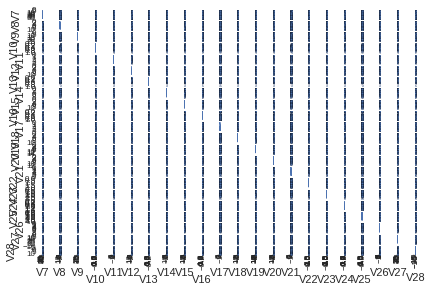

In [174]:
pd.tools.plotting.scatter_matrix(data.loc[:, "V7":"V28"], diagonal="kde")
plt.tight_layout()
plt.show()

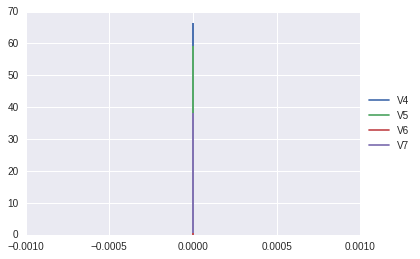

In [175]:
ax = data[["V4","V5","V6","V7"]].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

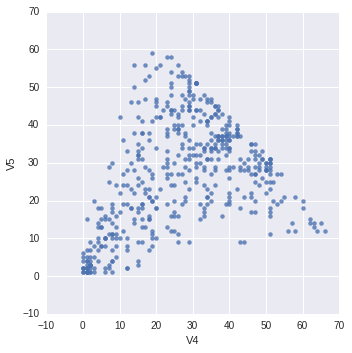

In [176]:
sns.lmplot("V4", "V5", data, fit_reg=False);


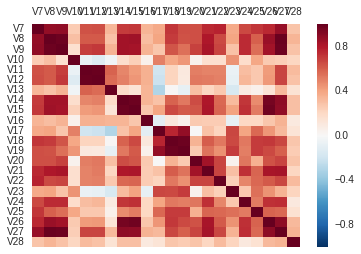

In [177]:
corrmat = X.corr()
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()


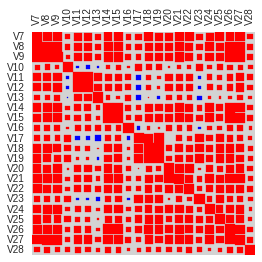

In [178]:
# adapted from http://matplotlib.org/examples/specialty_plots/hinton_demo.html
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2**np.ceil(np.log(np.abs(matrix).max())/np.log(2))

    ax.patch.set_facecolor('lightgray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'red' if w > 0 else 'blue'
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    nticks = matrix.shape[0]
    ax.xaxis.tick_top()
    ax.set_xticks(range(nticks))
    ax.set_xticklabels(list(matrix.columns), rotation=90)
    ax.set_yticks(range(nticks))
    ax.set_yticklabels(matrix.columns)
    ax.grid(False)

    ax.autoscale_view()
    ax.invert_yaxis()

hinton(corrmat)

In [179]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

In [180]:
mosthighlycorrelated(X, 10)


,FirstVariable,SecondVariable,Correlation
0,V8,V27,0.987757
1,V11,V12,0.986033
2,V14,V15,0.984336
3,V9,V27,0.983155
4,V8,V9,0.979059
5,V18,V19,0.978682
6,V15,V26,0.974644
7,V14,V26,0.953585
8,V14,V27,0.895391
9,V26,V27,0.891668


# PCA

In [181]:
X = data.loc[:, "V7":"V28"]
standardisedX = scale(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)


In [182]:
pca = PCA().fit(standardisedX)


In [183]:
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(zip(a, b, c), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary


In [184]:
summary = pca_summary(pca, standardisedX)


Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,3.407989,0.527927,0.527927
PC2,1.897672,0.163689,0.691616
PC3,1.136867,0.058748,0.750364
PC4,0.974830,0.043195,0.793560
PC5,0.934458,0.039691,0.833251
PC6,0.860608,0.033666,0.866917
PC7,0.798050,0.028949,0.895866
PC8,0.693772,0.021878,0.917744
PC9,0.649564,0.019179,0.936923


In [185]:
summary.sdev

,Standard deviation
PC1,3.407989
PC2,1.897672
PC3,1.136867
PC4,0.974830
PC5,0.934458
PC6,0.860608
PC7,0.798050
PC8,0.693772
PC9,0.649564
PC10,0.586280


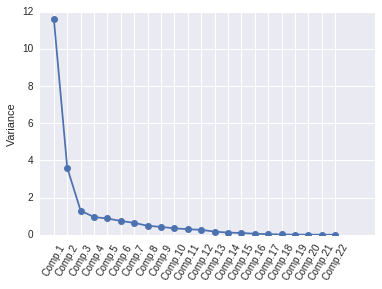

In [186]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, standardisedX)

0     -1.832167
1     -1.275823
2      2.976486
3     -0.656439
4     -1.427796
5     -3.562637
6      4.156765
7     -2.831665
8      1.811515
9      1.923209
         ...   
476   -0.797824
477   -4.217895
478   -4.552544
479    1.009665
480    1.788186
481    2.470316
482   -3.072846
483   -4.357410
484   -1.461219
485   -0.900957
Name: PC1, dtype: float64


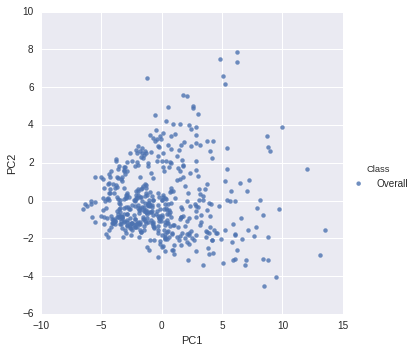

In [189]:
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(zip(foo[:, 0], foo[:, 1], classifs), columns=["PC1", "PC2", "Class"])
    print(bar.PC1)
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

pca_scatter(pca, standardisedX,y)
#cluster results??

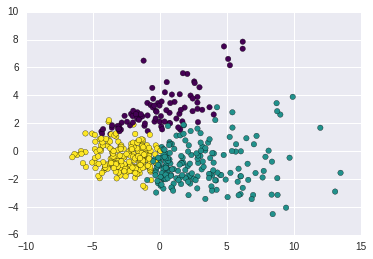

In [192]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=3,affinity='nearest_neighbors',
                           assign_labels='kmeans')

foo = pca.transform(standardisedX)
bar = pd.DataFrame(zip(foo[:, 0], foo[:, 1], y), columns=["PC1", "PC2", "Class"])
labels = model.fit_predict(foo)
plt.scatter(bar.PC1, bar.PC2, c=labels,
            s=30, cmap='viridis');
plt.show()
